# Overlay 

In [1]:
import pandas as pd
import utils

filename = 'data/measured_real_power.csv'
df = utils.read_csv(filename)

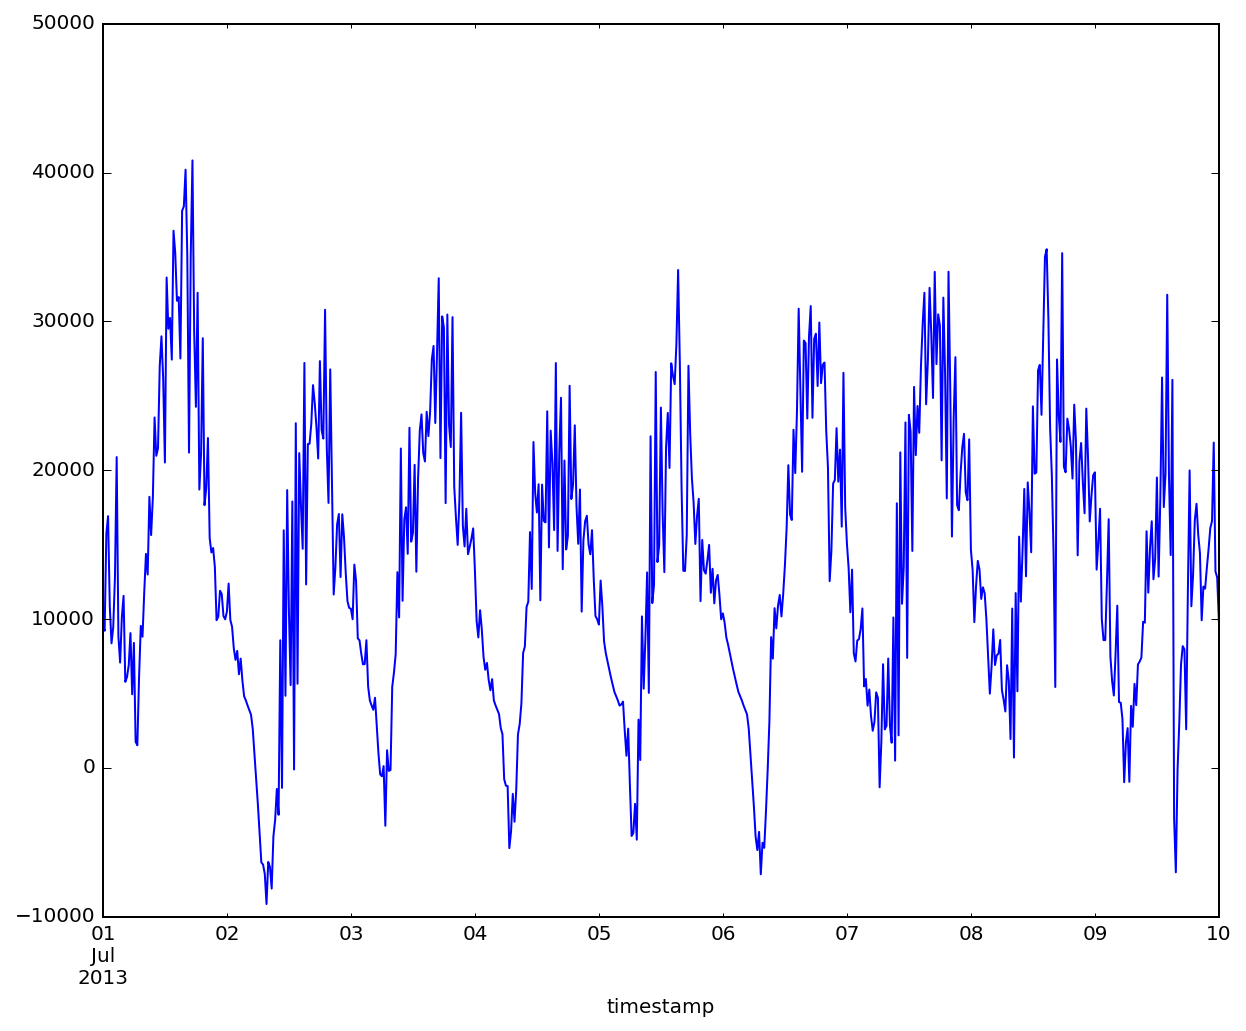

In [2]:
total = df.resample('20min').mean().sum(axis=1)
total.plot()

In [3]:
type(total)

pandas.core.series.Series

In [4]:
tmp = pd.DataFrame({'values': total})

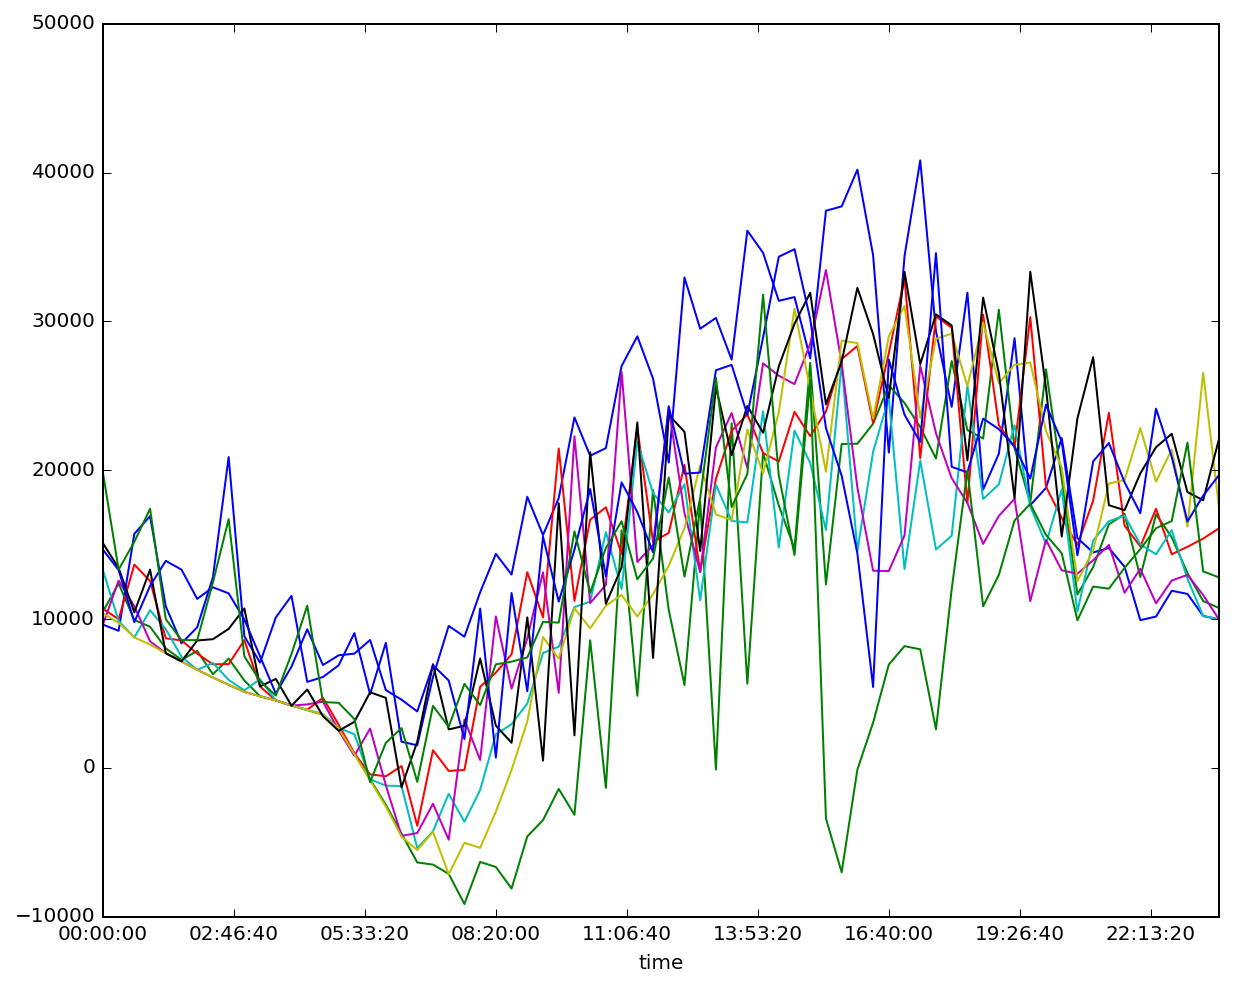

In [5]:
tmp['time'] = tmp.index.time
tmp['day'] = tmp.index.day
pivot = tmp.pivot(index='time', columns='day', values='values')

_  = pivot.plot(legend=False)

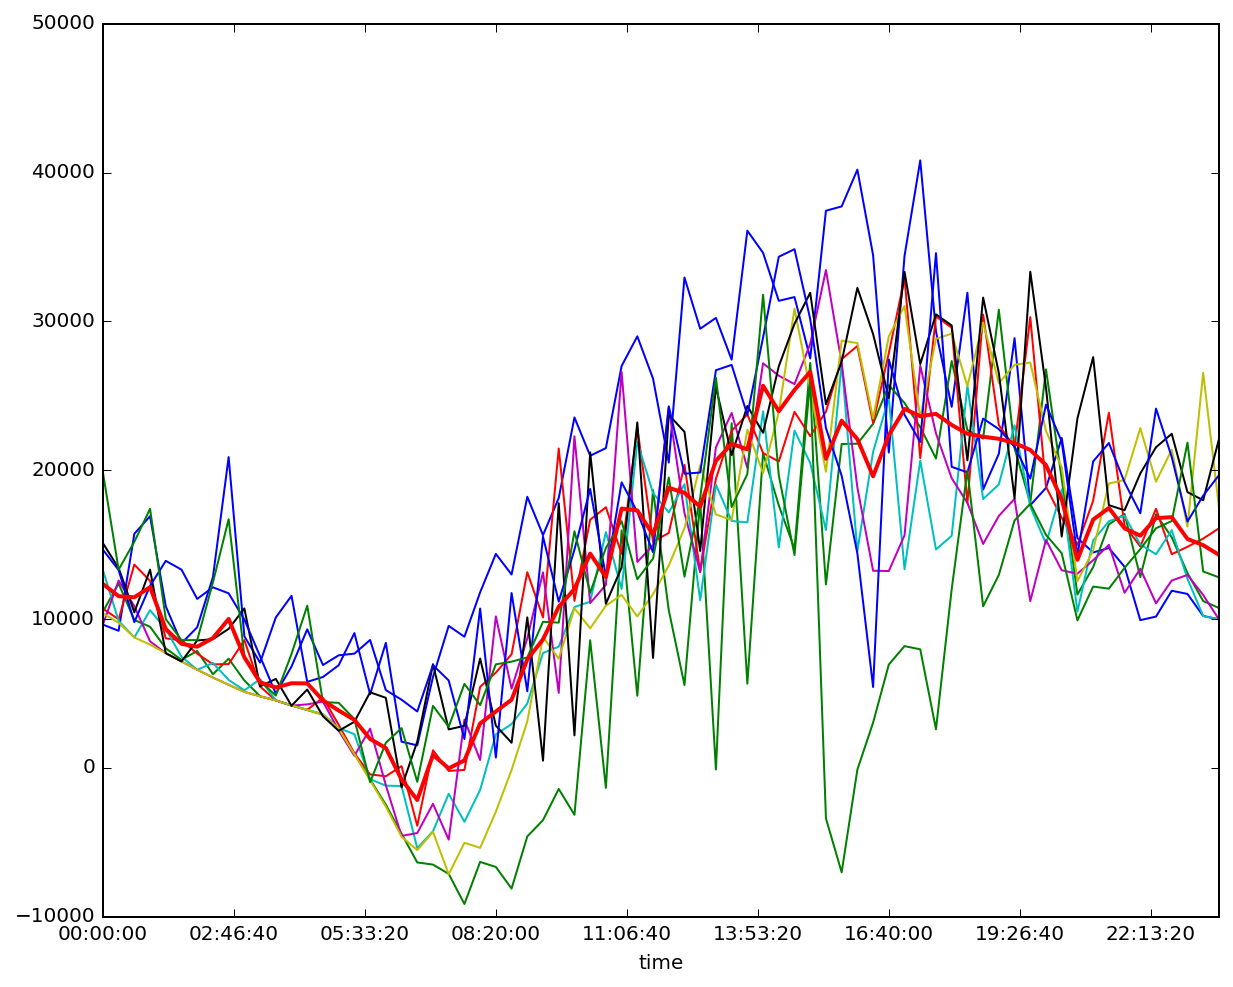

In [6]:
mean = pivot.mean(axis=1)
pivot.plot(legend=False)
_ = mean.plot(lw=2, color='red')

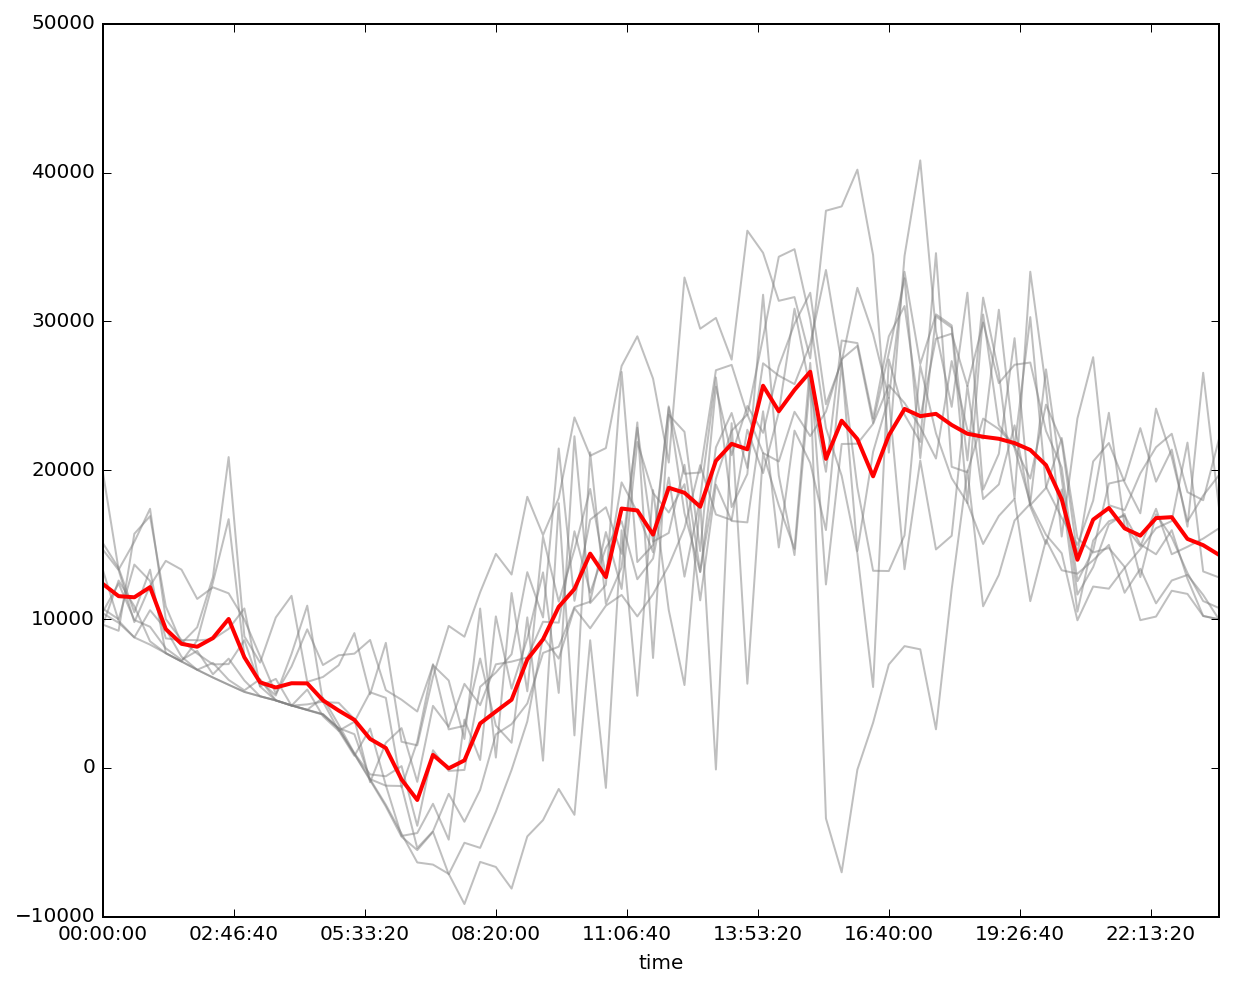

In [7]:
mean = pivot.mean(axis=1)
pivot.plot(legend=False, color=['grey' for x in pivot.columns], alpha=0.5)
_ = mean.plot(lw=2, color='red')

## Fill between

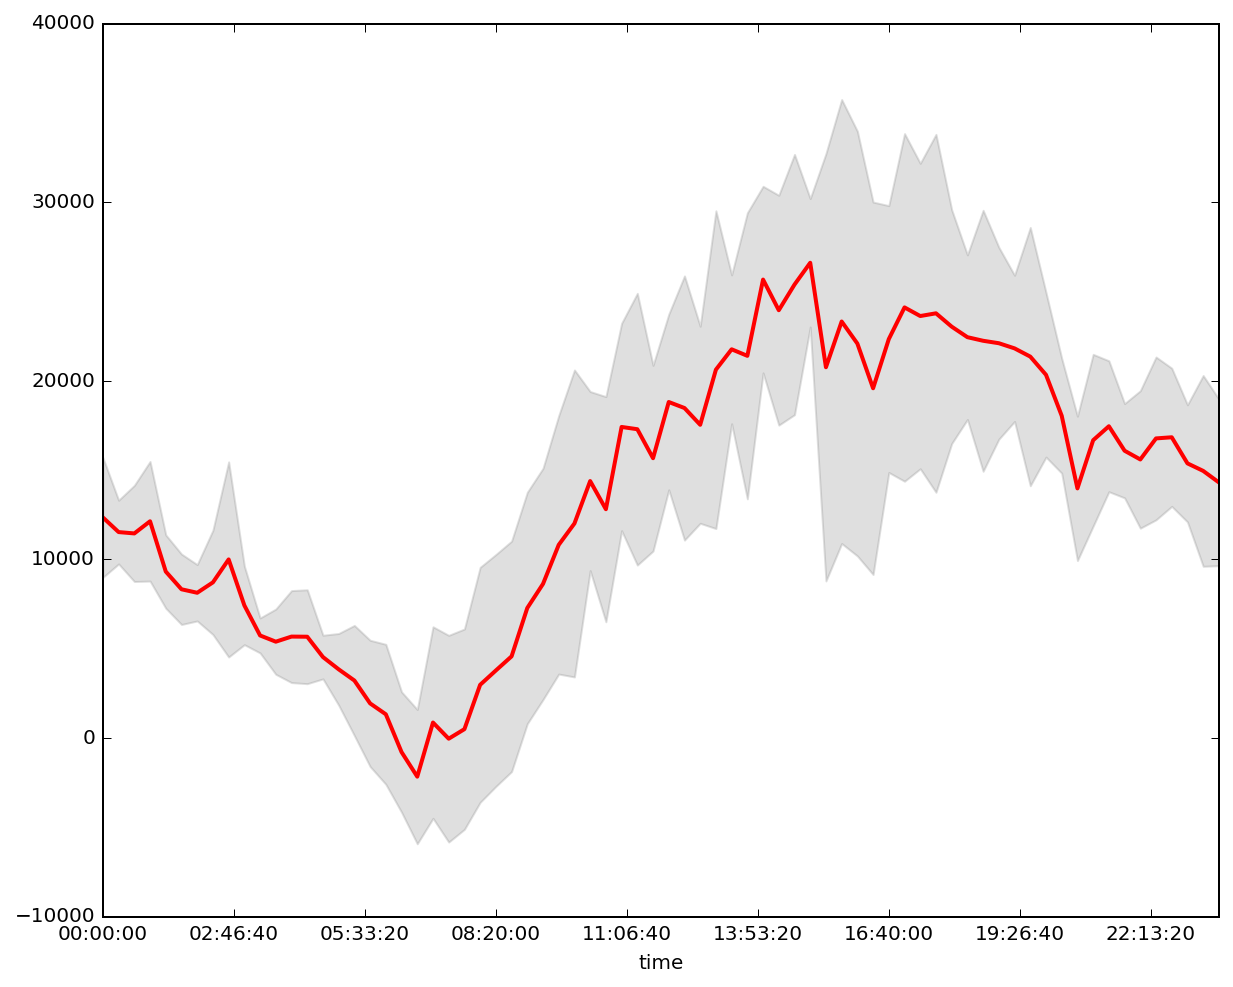

In [8]:
import matplotlib.pyplot as plt

upper = mean + pivot.std(axis=1)
lower = mean - pivot.std(axis=1)

mean.plot(lw=2, color='red')
plt.fill_between(upper.index, upper.values, lower.values, color='grey', alpha=0.25 )

## What about `bokeh`, `plotly`, and `seaborn`?

Send me what you've got!